# Assignment 6
Seth Spire
### Do Question 6, and three more questions of your choice.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random

In [4]:
metabric = pd.read_csv('metabric.csv', low_memory= False)

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

![a6_q1_2.jpg](attachment:a6_q1_2.jpg)

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$

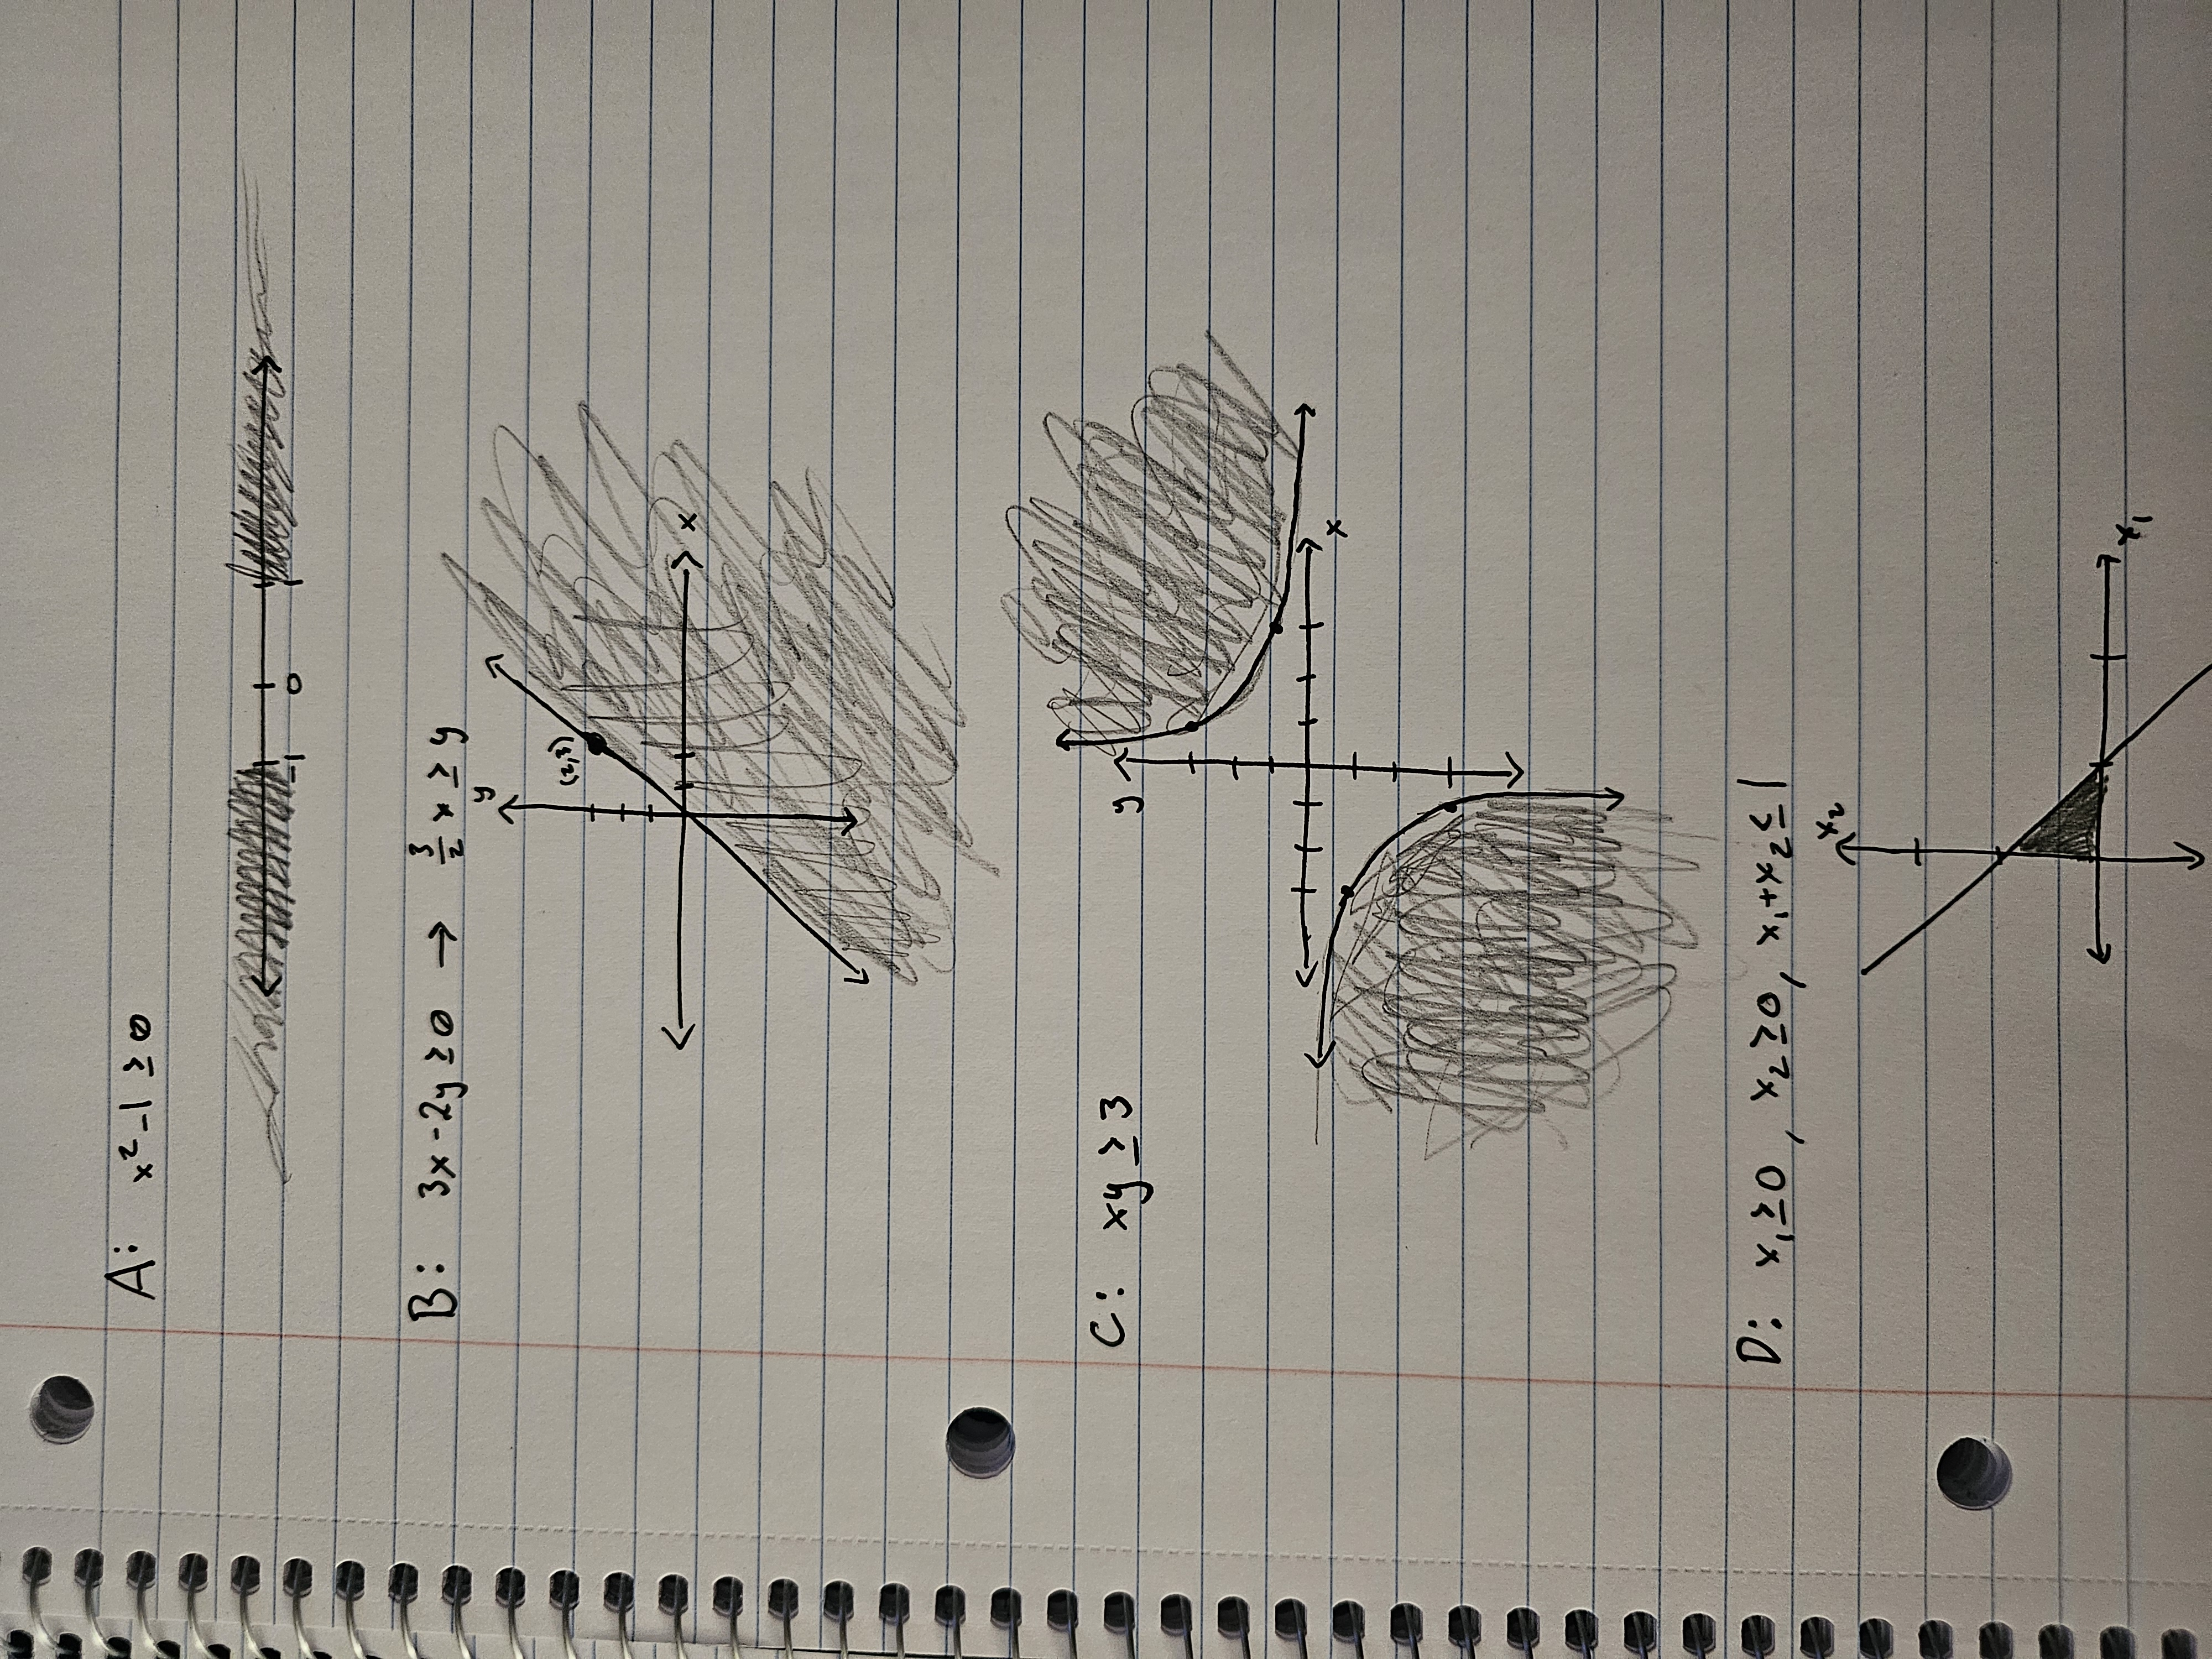

- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

> {}, {1}, {2}, {3}, {1,2}, {1,3}, {2,3}, {1,2,3}

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
> Outcomes: 1, 2, 3 (each for a probability of 1/3)

> Events and Event Probabilities: total of 8 events

|Number of outcomes in event|Events|Event Probability|
|-|-|-|
| No outcomes | {} | with p=0 |
| 1 outcome | {1}, {2}, {3} | p=1/3 for each |
| 2 outcomes | {1,2}, {1,3}, {2,3} | p=2/3 for each |
| 3 (all) outcomes | {1,2,3} | p=1 |

- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
> Outcomes: HH, HT, TH, TT (each with a probability of 1/4)

> Events and Event Probabilities:

|Number of outcomes in event|Events|Event Probability|
|-|-|-|
| No outcomes | {} | p=0 |
| 1 outcome | {HH}, {HT}, {TH}, {TT} | p=1/4 for each |
| 2 outcomes | {HH, HT}, {HH, TH}, {HH, TT}, {HT, TH}, {HT, TT}, {TH, TT} | p=1/2 for each |
| 3 outcomes | {HH, HT, TH}, {HH, HT, TT}, {HH, TH, TT}, {HT, TH, TT} | p=3/4 for each |
| 4 (all) outcomes | {HH, HT, TH, TT} | p=1 |

- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)
> Outcomes: 2, 3, 4, 5, 6 (with probabilities 1/9, 2/9, 3/9, 2/9, 1/9 respectively)

> Events: {}, {2}, {3}, ... {2,3}, {2,4}, ... {2,3,4,5,6} which is the power set of the outcomes such that there are 32 events such that every possible combination of the outcomes is represented without repition (all events with 0 outcomes, 1 outcome, 2 outcomes, 3 outcomes, 4 outcomes, and 5 outcomes)

> Event Probabilities: the probability of an event is the sum of the probabilities of the outcomes in the event. So {}=0, {3}=2/9, {2,3,4}=6/9, etc.

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.
> 3-sided dice do exist actually


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 

> Outcomes: 1, 2, 3, 4, 5, 6 (each with probability 1/6)

> Events and Probabilities (64 total):

|Number of outcomes in event|Events|Num events of that outcome size|Event Probability|
|-|-|-|-|
| No outcomes | {} | 1 | p=0 |
| 1 outcome | {1}, {2}, {3}, {4}, {5}, {6} | 6 | p=1/6 for each |
| 2 outcomes | {1,2}, {1,3}, {1,4}, {1,5}, {1,6}, {2,1}, {2,3}, ... {4,5}, {4,6}, {5,6} | 15 | p=2/6 for each |
| 3 outcomes | {1,2,3}, {1,2,4}, {1,2,5}, ... {4,5,6} | 20 | p=3/6 for each |
| 4 outcomes | {1,2,3,4}, {1,2,3,5}, ... {3,4,5,6} | 15 | p=4/6 for each |
| 5 outcomes | {1,2,3,4,5}, ... {2,3,4,5,6} | 6 | p=5/6 for each |
| 6 (all) outcomes | {1,2,3,4,5,6} | 1 | p=1 |


- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.

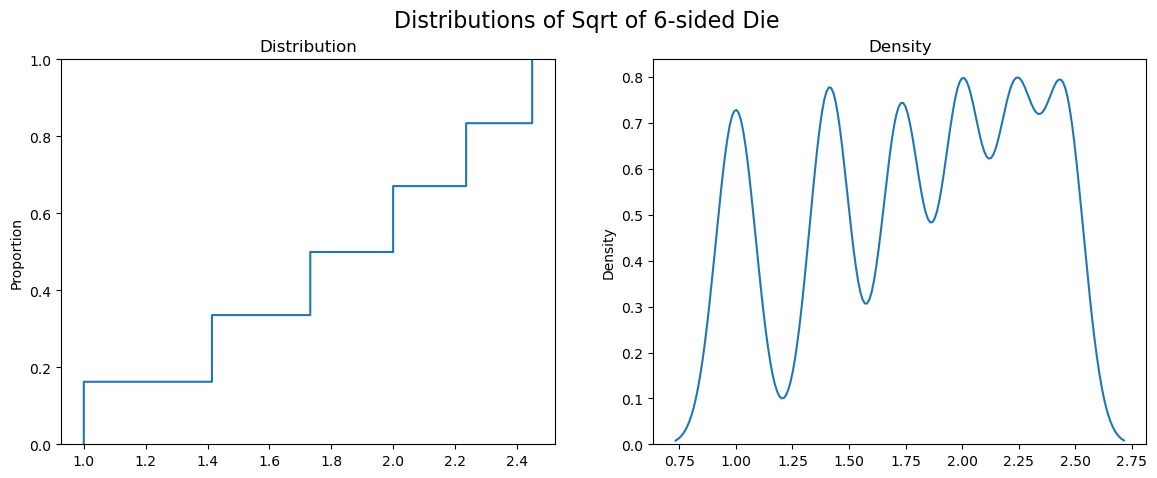

In [5]:
def random_sqrt_roll():
    pips = random.choice([1,2,3,4,5,6])
    return pips**0.5

rolls = [random_sqrt_roll() for _ in range(5000)]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.ecdfplot(x=rolls, ax=axes[0])
axes[0].set_title('Distribution')

sns.kdeplot(x=rolls, ax=axes[1])
axes[1].set_title('Density')

fig.suptitle('Distributions of Sqrt of 6-sided Die', fontsize=16)

plt.show()

- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?

> Outcomes: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

> Outcome probabilities: 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36 respectively

> Events: the power set of the sample space which is the empty set, the single-outcome events like {2} and {12}, the 2-outcome events like {2,3} and {11, 12}, all the way up to the 11-outcome event which is all outcomes {1,2,3,4,5,6,7,8,9,10,11,12}

- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

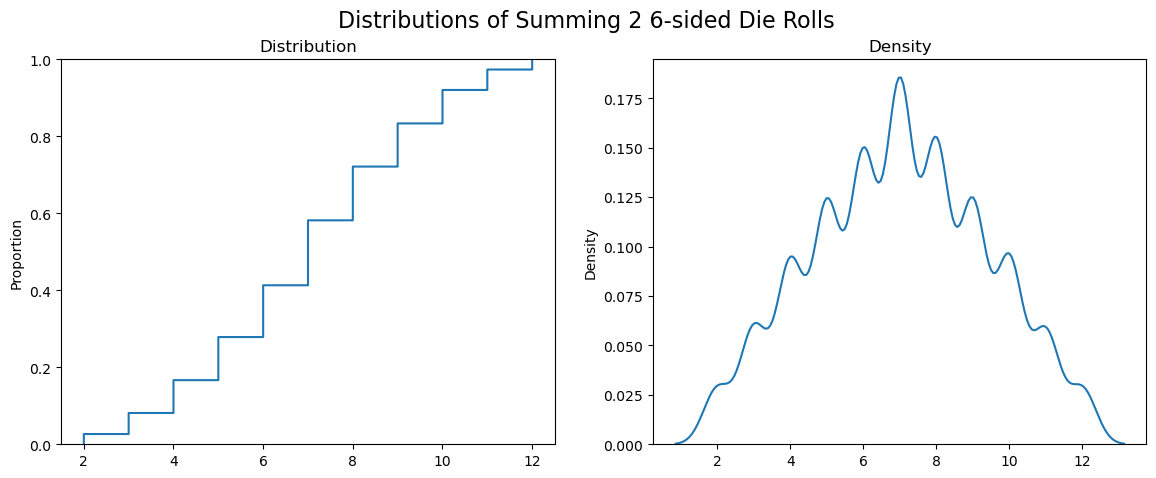

In [6]:
def random_double_roll():
    pips_1 = random.choice([1,2,3,4,5,6])
    pips_2 = random.choice([1,2,3,4,5,6])
    return pips_1 + pips_2

rolls = [random_double_roll() for _ in range(10000)]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.ecdfplot(x=rolls, ax=axes[0])
axes[0].set_title('Distribution')

sns.kdeplot(x=rolls, ax=axes[1])
axes[1].set_title('Density')

fig.suptitle('Distributions of Summing 2 6-sided Die Rolls', fontsize=16)

plt.show()

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions



For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- ***Logistic distribution*** (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} \quad \text{with $\sigma$ > 0}
$$
- Support: all real numbers, $(-\infty,+\infty)$
- density: 
$$ 
f(x; \sigma) = 
\dfrac{(1+e^{-x/\sigma})(0) - (1)((-1/\sigma)e^{-x/\sigma})}{(1+e^{-x/\sigma})^2} =
\dfrac{e^{-x/\sigma}}{\sigma(1+e^{-x/\sigma})^2}
$$


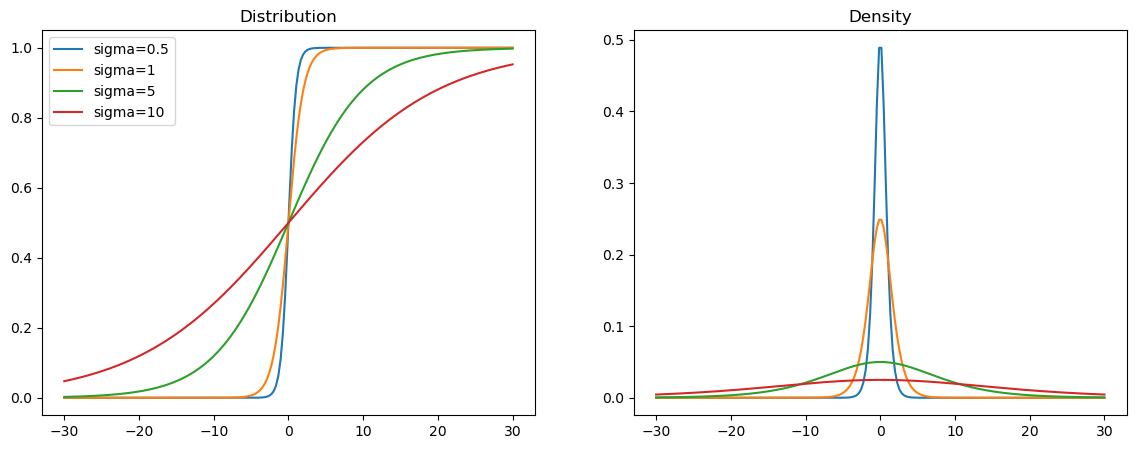

In [7]:
sigmas = [0.5, 1, 5, 10]
grid = np.linspace(-30,30,200)

fig, axes = plt.subplots(1,2,figsize=(14,5))
for sig in sigmas:
    cdf = sp.stats.logistic.cdf(grid, scale=sig)
    pdf = sp.stats.logistic.pdf(grid, scale=sig)

    sns.lineplot(x=grid, y=cdf, ax=axes[0], label=f'sigma={sig}')
    axes[0].set_title('Distribution')
    sns.lineplot(x=grid, y=pdf, ax=axes[1])
    axes[1].set_title('Density')
plt.show()

Text(0.5, 1.0, 'Distribution')

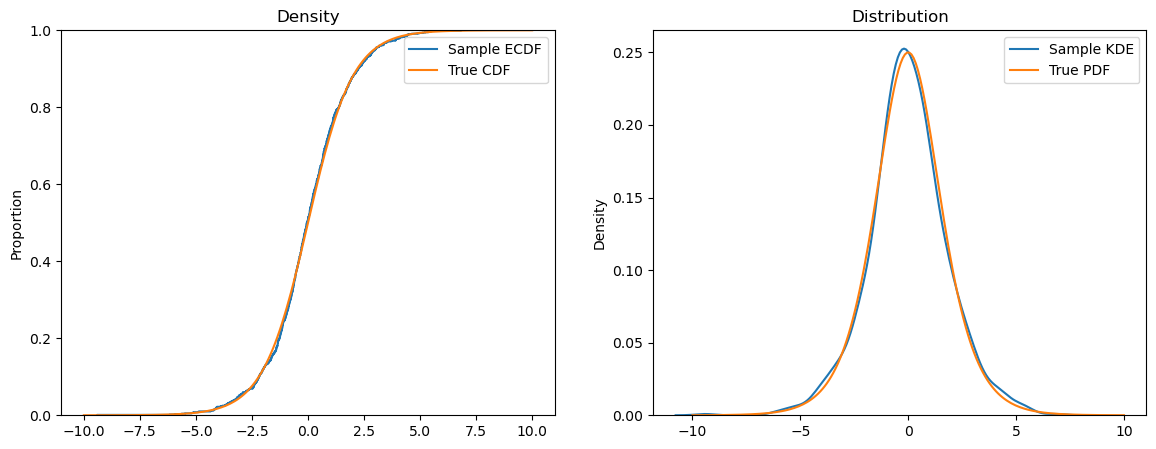

In [8]:
random_logistic = sp.stats.logistic.rvs(scale=1, size=1000, random_state=123)
grid = np.linspace(-10,10,200)
pdf = sp.stats.logistic.pdf(grid, scale=1)
cdf = sp.stats.logistic.cdf(grid, scale=1)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.ecdfplot(x=random_logistic, ax=axes[0], label='Sample ECDF')
sns.lineplot(x=grid, y=cdf, ax=axes[0], label='True CDF')
axes[0].set_title('Density')

sns.kdeplot(x=random_logistic, ax=axes[1], label='Sample KDE')
sns.lineplot(x=grid, y=pdf, ax=axes[1], label='True PDF')
axes[1].set_title('Distribution')

Location: 60.829577026462886, Scale: 7.579712717694734


<Axes: xlabel='Age at Diagnosis', ylabel='Density'>

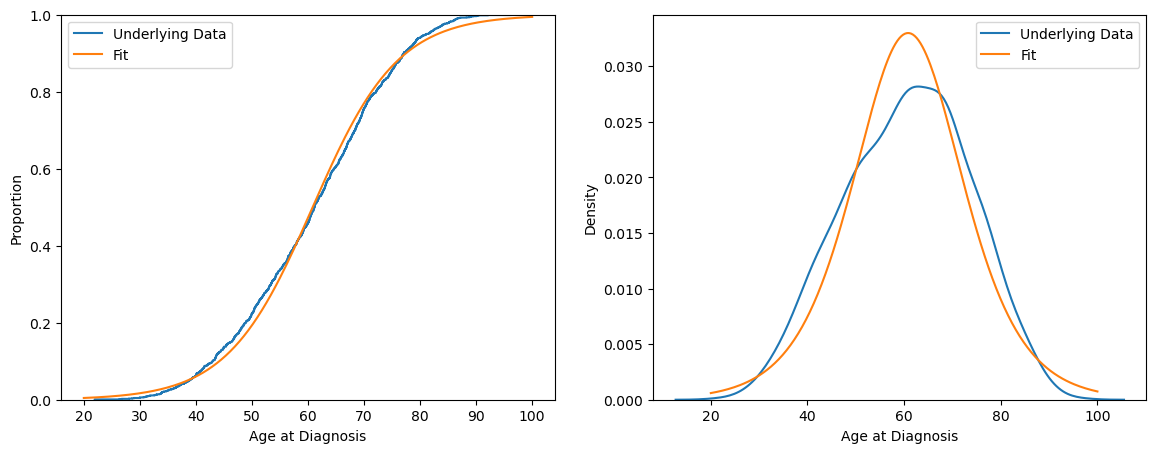

In [9]:
# Diagnosis Age and descriptive statistics 
diagnosis_age = metabric['Age at Diagnosis']
loc, scale = sp.stats.logistic.fit(diagnosis_age) # loc = mu (approx), scale = sigma*sqrt(3)/pi (approx)
print(f'Location: {loc}, Scale: {scale}')

# Distribution fit
grid = np.linspace(20,100,200)
cdf = sp.stats.logistic.cdf(grid, loc=loc, scale=scale)
pdf = sp.stats.logistic.pdf(grid, loc=loc, scale=scale)

# Plot True vs Fit
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.ecdfplot(x=diagnosis_age, label='Underlying Data', ax=axes[0])
sns.lineplot(x=grid, y=cdf, ax=axes[0], label='Fit')

sns.kdeplot(x=diagnosis_age, label='Underlying Data', ax=axes[1])
sns.lineplot(x=grid, y=pdf, ax=axes[1], label='Fit')

- ***Exponential distribution*** (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}  \quad \text{with $\lambda > 0$}
$$
- Support: $[0, +\infty)$
- density:
$$
f_X(x) = \begin{cases}
    0, & x<0 \\
    \lambda e^{-\lambda x}, & x \ge 0,
\end{cases}  \quad \text{with $\lambda > 0$}
$$


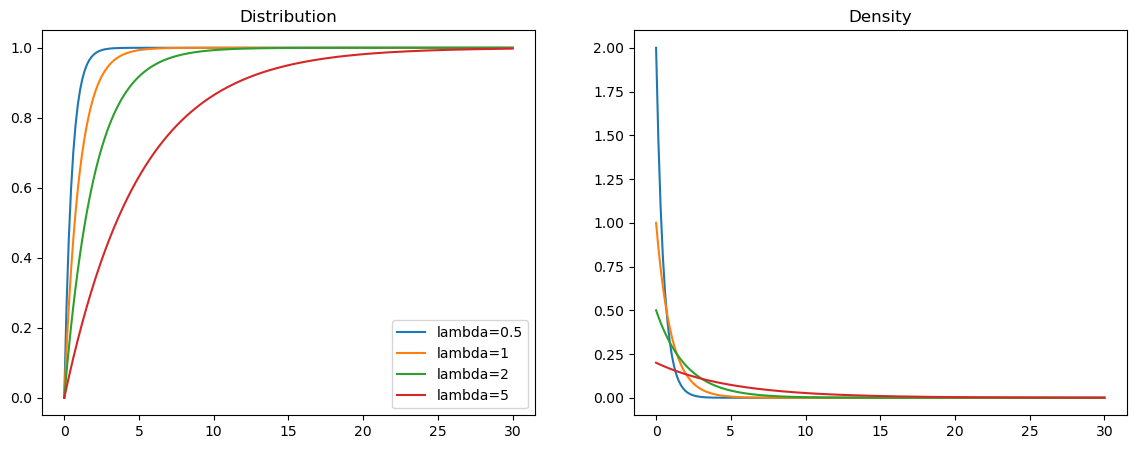

In [10]:
lambdas = [0.5, 1, 2, 5]
grid = np.linspace(0,30,200)

fig, axes = plt.subplots(1,2,figsize=(14,5))
for l in lambdas:
    cdf = sp.stats.expon.cdf(grid, scale=l)
    pdf = sp.stats.expon.pdf(grid, scale=l)

    sns.lineplot(x=grid, y=cdf, ax=axes[0], label=f'lambda={l}')
    axes[0].set_title('Distribution')
    sns.lineplot(x=grid, y=pdf, ax=axes[1])
    axes[1].set_title('Density')
plt.show()

Text(0.5, 1.0, 'Distribution')

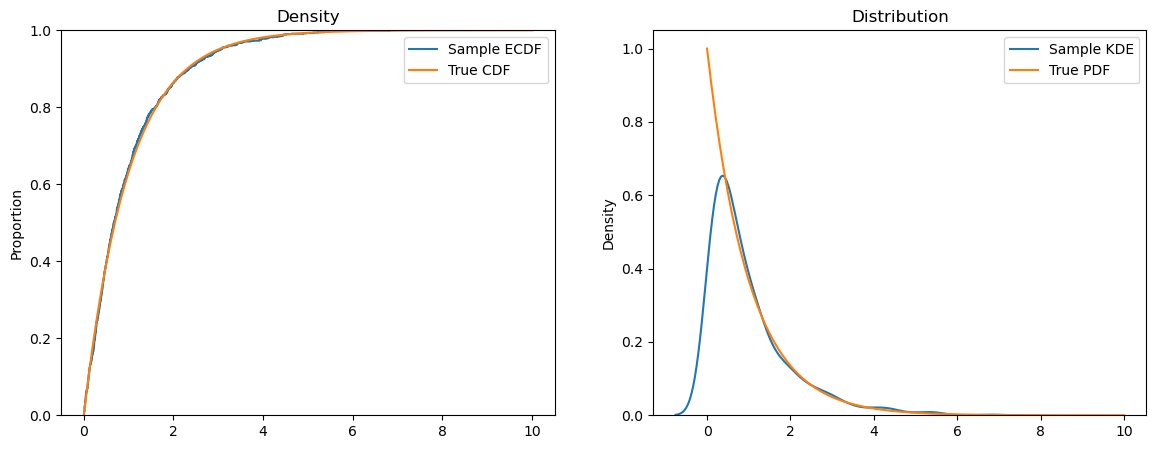

In [11]:
random_exp = sp.stats.expon.rvs(scale=1, size=1000, random_state=123)
grid = np.linspace(0,10,200)
pdf = sp.stats.expon.pdf(grid, scale=1)
cdf = sp.stats.expon.cdf(grid, scale=1)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.ecdfplot(x=random_exp, ax=axes[0], label='Sample ECDF')
sns.lineplot(x=grid, y=cdf, ax=axes[0], label='True CDF')
axes[0].set_title('Density')

sns.kdeplot(x=random_exp, ax=axes[1], label='Sample KDE')
sns.lineplot(x=grid, y=pdf, ax=axes[1], label='True PDF')
axes[1].set_title('Distribution')

Location: 1.307517704, Scale: 5.857056221612062


<Axes: xlabel='TMB (nonsynonymous)', ylabel='Density'>

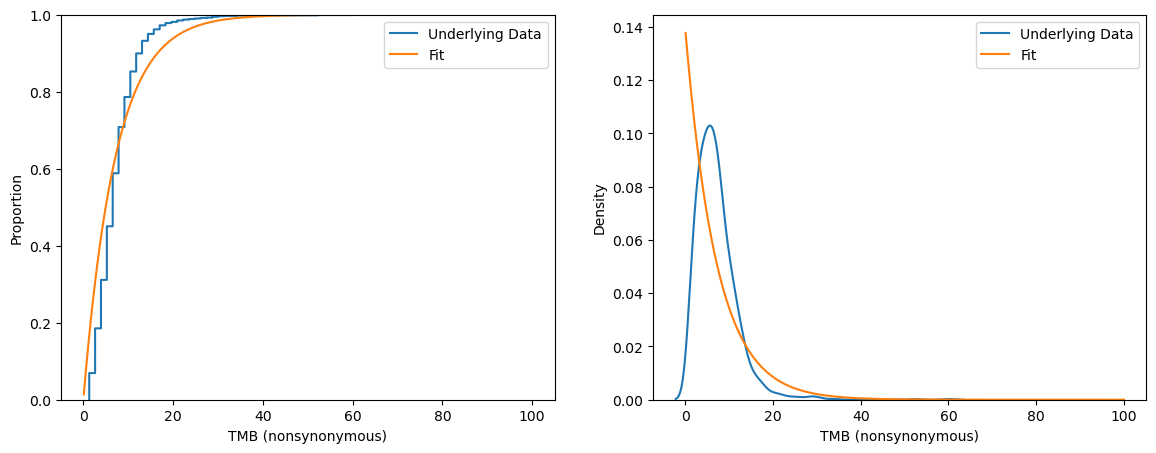

In [12]:
# Diagnosis Age and descriptive statistics 
tmb = metabric['TMB (nonsynonymous)']
lambda_hat = np.mean(tmb)
loc, scale = sp.stats.expon.fit(tmb) # loc = mu (approx), scale = sigma*sqrt(3)/pi (approx)
print(f'Location: {loc}, Scale: {scale}')

# Distribution fit
grid = np.linspace(0.1,100,200)
cdf = sp.stats.expon.cdf(grid, scale=lambda_hat)
pdf = sp.stats.expon.pdf(grid, scale=lambda_hat)

# Plot True vs Fit
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.ecdfplot(x=tmb, label='Underlying Data', ax=axes[0])
sns.lineplot(x=grid, y=cdf, ax=axes[0], label='Fit')

sns.kdeplot(x=tmb, label='Underlying Data', ax=axes[1])
sns.lineplot(x=grid, y=pdf, ax=axes[1], label='Fit')

- ***Negative Binomial*** (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
- Support: k is Integers >= 0

You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?


In [13]:
p = 0.5
r = 4
k = range(0, 20) # number of failed trials
cdf = sp.stats.nbinom.cdf(k, r, p)
pd.DataFrame({'Failed Trials': k, 'Probability of Having 4 Successes': cdf})


Failed Trials  Probability of Having 4 Successes
0               0                           0.062500
1               1                           0.187500
2               2                           0.343750
3               3                           0.500000
4               4                           0.636719
5               5                           0.746094
6               6                           0.828125
7               7                           0.886719
8               8                           0.927002
9               9                           0.953857
10             10                           0.971313
11             11                           0.982422
12             12                           0.989365
13             13                           0.993637
14             14                           0.996231
15             15                           0.997787
16             16                           0.998712
17             17                           0.999255
18             18                           0.999572
19             19                           0.999756

...

- The negative binomial distirbution can be used in place of the poisson distribution if the observations are overdispersed, I showed that below but I don't think that is what this question wanted, but it is still here:

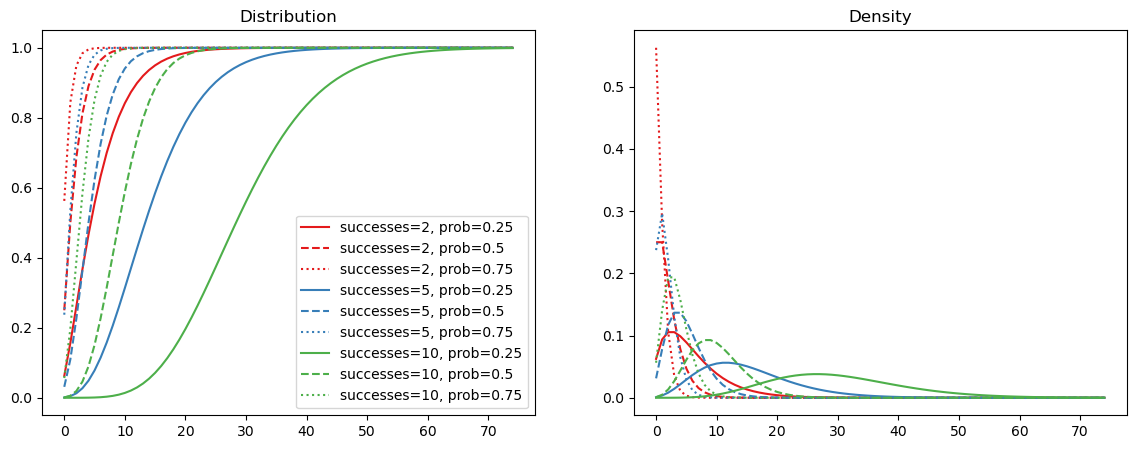

In [14]:
k = range(0, 75) # number of failed trials
success_trials = [2, 5, 10] # r = required number of successes of individual trials
success_prob = [0.25, 0.5, 0.75] # p = success probability on individual trial
# so negative binomial distribution is for the number of failed trials (k) before there are a certain number of successes (r) given that the probability of success (p) is the same on each trial
# given a certain number of failed trials (k), the expected probability of having a certain number of successes (r) given that the probability of success (p) is the same on each trial is the resultant CDF

fig, axes = plt.subplots(1,2,figsize=(14,5))
for i in range(len(success_trials)):
    for j in range(len(success_prob)):
        r = success_trials[i]
        p = success_prob[j]

        color = sns.color_palette("Set1", 3)[i]
        linestyle = ["-", "--", ":"][j]  # rotate through 3 dash styles

        cdf = sp.stats.nbinom.cdf(k, r, p)
        pmf = sp.stats.nbinom.pmf(k, r, p)

        sns.lineplot(x=k, y=cdf, ax=axes[0], color=color, linestyle=linestyle, label=f'successes={r}, prob={p}')
        axes[0].set_title('Distribution')
        sns.lineplot(x=k, y=pmf, ax=axes[1], color=color, linestyle=linestyle)
        axes[1].set_title('Density')
plt.show()

Text(0.5, 1.0, 'Distribution')

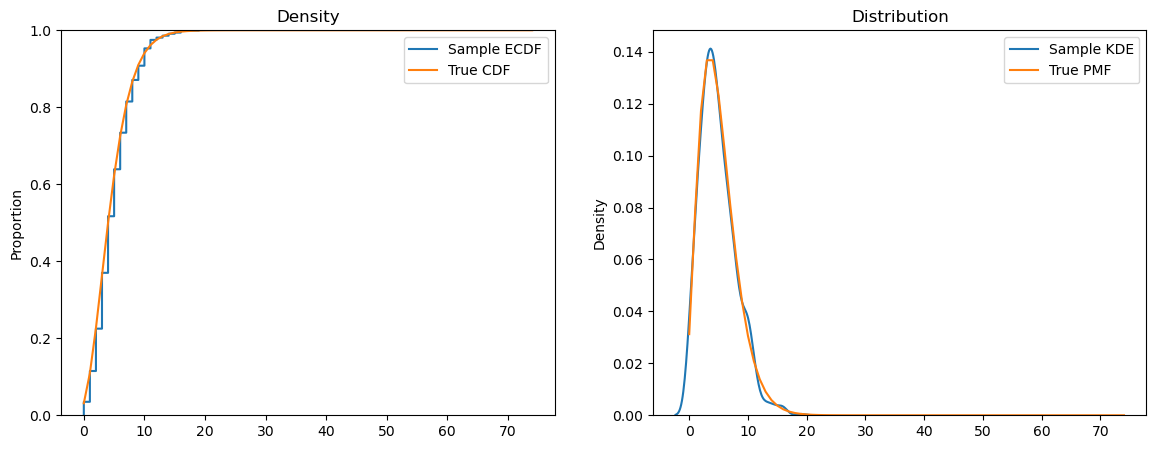

In [59]:
random_nbinom = sp.stats.nbinom.rvs(n=5, p=0.5, size=1000, random_state=123)
k = range(0, 75)
pmf = sp.stats.nbinom.pmf(k, 5, 0.5)
cdf = sp.stats.nbinom.cdf(k, 5, 0.5)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.ecdfplot(x=random_nbinom, ax=axes[0], label='Sample ECDF')
sns.lineplot(x=k, y=cdf, ax=axes[0], label='True CDF')
axes[0].set_title('Density')

sns.kdeplot(x=random_nbinom, ax=axes[1], label='Sample KDE')
sns.lineplot(x=k, y=pmf, ax=axes[1], label='True PMF')
axes[1].set_title('Distribution')

sample Mean: 1.8600148920327624, Sample Variance: 14.864990915638243
sample variance is larger so I think that means that a negative binomial distribution might be a good fit as it is discrete data that is overdispersed
p: 0.12512721350377634, r: 0.2660255114891399


<Axes: xlabel='Lymph nodes examined positive', ylabel='Density'>

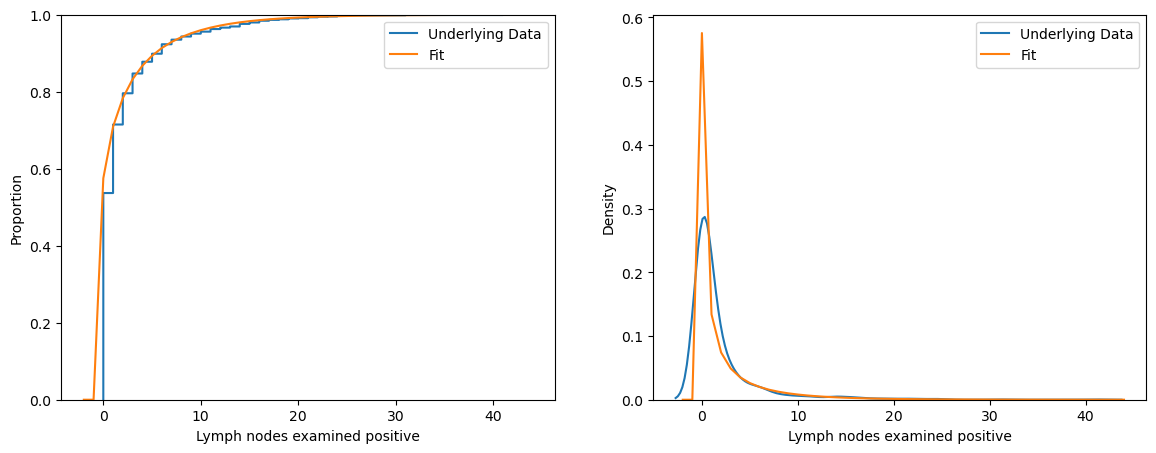

In [16]:
# Positive lymph nodes and descriptive statistics 
pos_lymph = metabric['Lymph nodes examined positive']
mean_hat = np.mean(pos_lymph)
var_hat = np.var(pos_lymph)
print(f'sample Mean: {mean_hat}, Sample Variance: {var_hat}')
print("sample variance is larger so I think that means that a negative binomial distribution might be a good fit as it is discrete data that is overdispersed")

p = mean_hat/var_hat # found from manipulating definitions of mean and variance for a negative binomial distribution based on p and r
r = (mean_hat**2)/(var_hat - mean_hat)
print(f'p: {p}, r: {r}')

# Distribution fit
k = range(-2, 45)
cdf = sp.stats.nbinom.cdf(k, r, p)
pmf = sp.stats.nbinom.pmf(k, r, p)

# Plot True vs Fit
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.ecdfplot(x=pos_lymph, label='Underlying Data', ax=axes[0])
sns.lineplot(x=k, y=cdf, ax=axes[0], label='Fit')

sns.kdeplot(x=pos_lymph, label='Underlying Data', ax=axes[1])
sns.lineplot(x=k, y=pmf, ax=axes[1], label='Fit')

- ***Categorical*** (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.

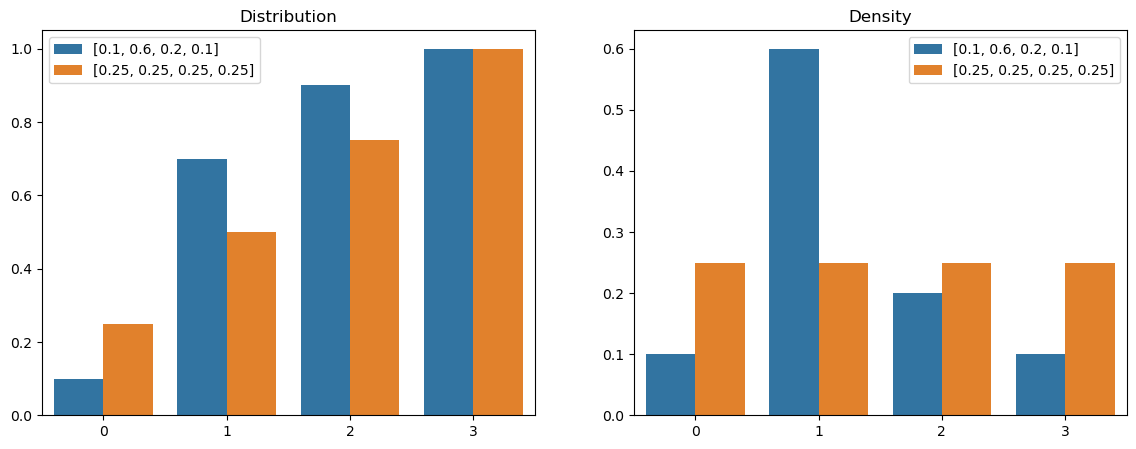

In [87]:
probabilities = [[0.1, 0.6, 0.2, 0.1], [1/4, 1/4, 1/4, 1/4]]
num_probs = len(probabilities[0])
possible_outcomes = [[1 if j == i else 0 for j in range(num_probs)] for i in range(num_probs)]
x=[str(x) for x in range(num_probs)]

fig, axes = plt.subplots(1,2,figsize=(14,5))

all_x = []
pmfs = []
cdfs = []
category = []
for i, prob in enumerate(probabilities):
    categorical_dist = sp.stats.multinomial(n=1, p=prob)
    pmf = categorical_dist.pmf(possible_outcomes)
    cdf = np.cumsum(pmf)
    cat = [str(prob)]*num_probs

    pmfs.extend([x.astype(float) for x in pmf])
    cdfs.extend(list(cdf))
    category.extend(cat)
    all_x.extend(x)

sns.barplot(x=all_x, y=cdfs, hue=category, ax=axes[0])
axes[0].set_title('Distribution')
sns.barplot(x=all_x, y=pmfs, hue=category, ax=axes[1])
axes[1].set_title('Density')

plt.show()

> The density just directly matches the probabilities directly, the distribution is the cummulative sum of the probabilities

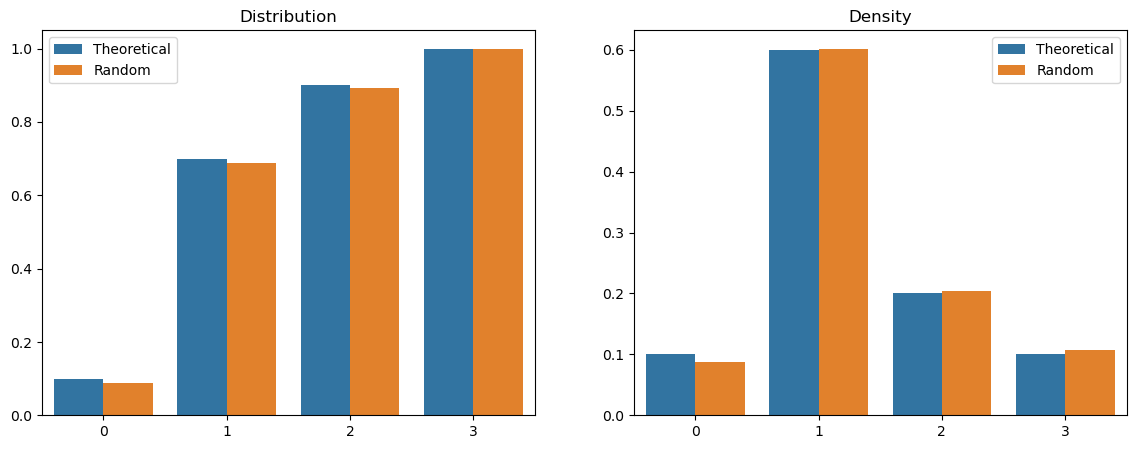

In [127]:
prob = [0.1, 0.6, 0.2, 0.1]
categorical_dist = sp.stats.multinomial(n=1, p=prob)

# get theoretical
outcomes = [[1 if j == i else 0 for j in range(num_probs)] for i in range(num_probs)]
pmf = categorical_dist.pmf(outcomes)
cdf = np.cumsum(pmf)

# get random
random_categorical = categorical_dist.rvs(size=1000, random_state=123)
random_density = np.array(random_categorical).sum(axis=0)/1000
random_distribution = np.cumsum(random_density)

# combine
all_x = [0,1,2,3]*2
pmfs = [x.astype(float) for x in pmf]
pmfs.extend(random_density)
cdfs = list(cdf.copy())
cdfs.extend(random_distribution)
category = ['Theoretical' for _ in range(num_probs)] + ['Random' for _ in range(num_probs)]

# print(all_x)
# print(pmfs)
# print(cdfs)
# print(category)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x=all_x, y=cdfs, hue=category, ax=axes[0])
axes[0].set_title('Distribution')
sns.barplot(x=all_x, y=pmfs, hue=category, ax=axes[1])
axes[1].set_title('Density')

plt.show()

In [129]:
# I will manually check value counts to get an estimation of the probabilities
metabric.value_counts('Tumor Stage', normalize=True).reset_index().sort_values('Tumor Stage')['proportion']

4    0.001489
1    0.341028
0    0.571109
2    0.081162
3    0.005212
Name: proportion, dtype: float64

[0.0014892  0.34251675 0.91362621 0.99478779 1.        ]


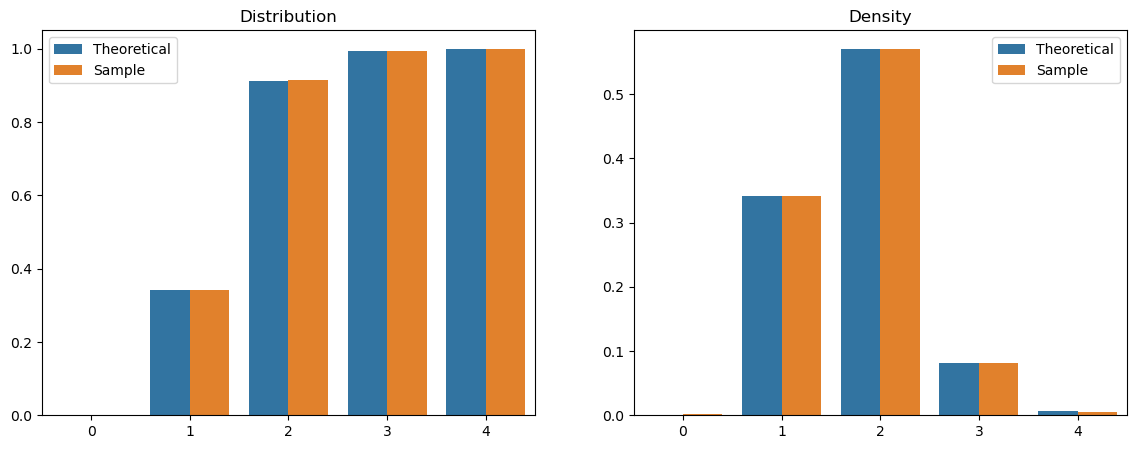

In [128]:
prob = [0.001, 0.341, 0.571, 0.081, 0.006]
categorical_dist = sp.stats.multinomial(n=1, p=prob)

# get theoretical
outcomes = [[1 if j == i else 0 for j in range(len(prob))] for i in range(len(prob))]
pmf = categorical_dist.pmf(outcomes)
cdf = np.cumsum(pmf)

# get metabric
tumor_stage_density = list(metabric.value_counts('Tumor Stage', normalize=True).reset_index().sort_values('Tumor Stage')['proportion'])
tumor_stage_distribution = np.cumsum(tumor_stage_density)
print(tumor_stage_distribution)
# combine
all_x = [x for x in range(len(prob))]*2
pmfs = [x.astype(float) for x in pmf]
pmfs.extend(tumor_stage_density)
cdfs = list(cdf.copy())
cdfs.extend(tumor_stage_distribution)
category = ['Theoretical' for _ in range(len(prob))] + ['Sample' for _ in range(len(prob))]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x=all_x, y=cdfs, hue=category, ax=axes[0])
axes[0].set_title('Distribution')
sns.barplot(x=all_x, y=pmfs, hue=category, ax=axes[1])
axes[1].set_title('Density')

plt.show()